#Datasets Analysis

In [62]:
import pandas as pd

##Original dataset

In [63]:
df=pd.read_csv('Instagram_profile_20220220_172954.success.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
df = df.dropna(axis=0, subset=['account'])

In [65]:
df.shape

(74508, 20)

In [66]:
df.columns

Index(['account', 'caption', 'profile_name', 'profile_image_link', 'biography',
       'id', 'business_email', 'external_url', 'following', 'likes',
       'media_type', 'posts_count', 'followers', 'is_verified', 'datetime',
       'image_url', 'url', 'comments', 'thumbnails', 'location'],
      dtype='object')

##Preprocessing

In [67]:
from functools import reduce


In [68]:
%run preprocessing.ipynb

In [69]:
PREPROCESSING_PIPELINE = [#translation,
                          clean_mention,
                          clean_hashtags,
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          replace_by_underscore,
                          remove_stopwords,
                          strip_text,
                          remove_emoji]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]


# Anchor method

def text_prepare(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)



def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """

    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1

    return reduce(lambda txt, f: f(txt), filter_methods, text)


# L=['hashtags','emoji_text','mentions']
# A=['caption','emoji_text']

# for i in L:
#   df[i] = df[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

# for i in A:
#   df[i]=df[i].apply(lambda txt: text_prepare(str(txt)))

#df['caption'] = df['caption'].apply(lambda txt: text_prepare1(str(txt)[1:-1]))


In [70]:
df['caption']=df['caption'].apply(lambda txt: text_prepare(str(txt)))
df

,account,caption,profile_name,profile_image_link,biography,id,business_email,external_url,following,likes,media_type,posts_count,followers,is_verified,datetime,image_url,url,comments,thumbnails,location
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,https://scontent-lcy1-1.cdninstagram.com/v/t51...,General Health | Orthopaedic Care | Advanced A...,2.504540e+18,NaN,https://www.chelseabridgeclinic.com/c19testing...,964.0,14.0,Carousel,47.0,1093.0,NaN,1612784425000.0,j_kzvc99wm2q4pjru5kn.abcda1ffd273a050538c28dff...,https://www.instagram.com/p/CLB6aHwlg_2/,0.0,"[{""src"":""https://instagram.flba1-1.fna.fbcdn.n...",Chelsea Bridge Clinic
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 We grateful kind words feedback rec...,Chelsea Bridge Clinic,https://scontent-lcy1-1.cdninstagram.com/v/t51...,General Health | Orthopaedic Care | Advanced A...,2.491550e+18,NaN,https://www.chelseabridgeclinic.com/c19testing...,964.0,12.0,Carousel,47.0,1093.0,NaN,1611235877000.0,j_kzvc99wm2q4pjru5kn.abcda1ffd273a050538c28dff...,https://www.instagram.com/p/CKTwyYEFklA/,0.0,"[{""src"":""https://instagram.flba1-1.fna.fbcdn.n...",Chelsea Bridge Clinic
12,numberoneedin,Hand dived Isle Jura scallop smoked roe leek c...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.777225e+18,NaN,http://linktr.ee/numberoneedin,308.0,100.0,Image,343.0,4202.0,1.0,1645291057000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CaKr4xcoJ4B/,2.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",NaN
13,numberoneedin,Jerusalem Artichoke prepared first dessert mal...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.763506e+18,NaN,http://linktr.ee/numberoneedin,308.0,81.0,Image,343.0,4202.0,1.0,1643655662000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CZZ8nMdt185/,1.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",Number One
14,numberoneedin,Main course seasonal course menu: Borders Roe...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.759822e+18,NaN,http://linktr.ee/numberoneedin,308.0,146.0,Image,343.0,4202.0,1.0,1643216482000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CZM28YqA3bj/,1.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",Number One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,Alongside hospitality performing arts also mas...,NaN,https://instagram.fbhx3-1.fna.fbcdn.net/v/t51....,At the forefront of the luxury hotel scene for...,2.487324e+18,NaN,https://www.thesavoylondon.com/restaurant/savo...,599.0,4079,Image,1933.0,167394.0,1.0,1610732193000,j_kzvc99wm2q4pjru5kn.581c2c8ee819d0e36b84f684f...,https://www.instagram.com/p/CKEwFdoAMaN/,67,"[{""src"":""https://instagram.fbrs4-2.fna.fbcdn.n...",NaN
74545,thesavoylondon,This Isn’t looking forward Waking beautiful ni...,NaN,https://instagram.fbhx3-1.fna.fbcdn.net/v/t51....,At the forefront of the luxury hotel scene for...,2.485790e+18,NaN,https://www.thesavoylondon.com/restaurant/savo...,599.0,1621,Image,1933.0,167394.0,1.0,1610549312000,j_kzvc99wm2q4pjru5kn.581c2c8ee819d0e36b84f684f...,https://www.instagram.com/p/CJ_TRHuA5IE/,34,"[{""src"":""https://instagram.fbrs4-2.fna.fbcdn.n...",The Savoy
74546,thesavoylondon,For missing London town here’s shot really sho...,NaN,https://instagram.fbhx3-1.fna.fbcdn.net/v/t51....,At the forefront of the luxury hotel scene for...,2.484262e+18,NaN,https://www.thesavoylondon.com/restaurant/savo...,599.0,1548,Image,1933.0,167394.0,1.0,1610367106000,j_kzvc99wm2q4pjru5kn.581c2c8ee819d0e36b84f684f...,https://www.instagram.com/p/CJ53vJDgJ2I/,28,"[{""src"":""https://instagram.fbrs4-2.fna.fbcdn.n...",NaN
74547,thesavoylondon,While we’re closed we’re going try keep happy ...,NaN,https://instag

In [71]:
# import advertools as adv
# hashtag_summary = adv.extract_hashtags(df['caption'])
# hashtag_summary.keys()

In [72]:
# mention_summary = adv.extract_mentions(df['caption'])
# mention_summary.keys()

In [73]:
# emoji_summary = adv.extract_emoji(df['caption'])
# emoji_summary.keys()

In [74]:
# df =  (df.assign(hashtags=hashtag_summary['hashtags'],
#          hashcounts=hashtag_summary['hashtag_counts'],
#          mentions=mention_summary['mentions'],
#          mention_count=mention_summary['mention_counts'],
#          emoji=emoji_summary['emoji'],
#          emoji_text=emoji_summary['emoji_text'],
#          emoji_count=emoji_summary['emoji_counts']         
#          ))

# df.head(5)

In [75]:
df

,account,caption,profile_name,profile_image_link,biography,id,business_email,external_url,following,likes,media_type,posts_count,followers,is_verified,datetime,image_url,url,comments,thumbnails,location
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,https://scontent-lcy1-1.cdninstagram.com/v/t51...,General Health | Orthopaedic Care | Advanced A...,2.504540e+18,NaN,https://www.chelseabridgeclinic.com/c19testing...,964.0,14.0,Carousel,47.0,1093.0,NaN,1612784425000.0,j_kzvc99wm2q4pjru5kn.abcda1ffd273a050538c28dff...,https://www.instagram.com/p/CLB6aHwlg_2/,0.0,"[{""src"":""https://instagram.flba1-1.fna.fbcdn.n...",Chelsea Bridge Clinic
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 We grateful kind words feedback rec...,Chelsea Bridge Clinic,https://scontent-lcy1-1.cdninstagram.com/v/t51...,General Health | Orthopaedic Care | Advanced A...,2.491550e+18,NaN,https://www.chelseabridgeclinic.com/c19testing...,964.0,12.0,Carousel,47.0,1093.0,NaN,1611235877000.0,j_kzvc99wm2q4pjru5kn.abcda1ffd273a050538c28dff...,https://www.instagram.com/p/CKTwyYEFklA/,0.0,"[{""src"":""https://instagram.flba1-1.fna.fbcdn.n...",Chelsea Bridge Clinic
12,numberoneedin,Hand dived Isle Jura scallop smoked roe leek c...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.777225e+18,NaN,http://linktr.ee/numberoneedin,308.0,100.0,Image,343.0,4202.0,1.0,1645291057000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CaKr4xcoJ4B/,2.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",NaN
13,numberoneedin,Jerusalem Artichoke prepared first dessert mal...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.763506e+18,NaN,http://linktr.ee/numberoneedin,308.0,81.0,Image,343.0,4202.0,1.0,1643655662000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CZZ8nMdt185/,1.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",Number One
14,numberoneedin,Main course seasonal course menu: Borders Roe...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.759822e+18,NaN,http://linktr.ee/numberoneedin,308.0,146.0,Image,343.0,4202.0,1.0,1643216482000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CZM28YqA3bj/,1.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",Number One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,Alongside hospitality performing arts also mas...,NaN,https://instagram.fbhx3-1.fna.fbcdn.net/v/t51....,At the forefront of the luxury hotel scene for...,2.487324e+18,NaN,https://www.thesavoylondon.com/restaurant/savo...,599.0,4079,Image,1933.0,167394.0,1.0,1610732193000,j_kzvc99wm2q4pjru5kn.581c2c8ee819d0e36b84f684f...,https://www.instagram.com/p/CKEwFdoAMaN/,67,"[{""src"":""https://instagram.fbrs4-2.fna.fbcdn.n...",NaN
74545,thesavoylondon,This Isn’t looking forward Waking beautiful ni...,NaN,https://instagram.fbhx3-1.fna.fbcdn.net/v/t51....,At the forefront of the luxury hotel scene for...,2.485790e+18,NaN,https://www.thesavoylondon.com/restaurant/savo...,599.0,1621,Image,1933.0,167394.0,1.0,1610549312000,j_kzvc99wm2q4pjru5kn.581c2c8ee819d0e36b84f684f...,https://www.instagram.com/p/CJ_TRHuA5IE/,34,"[{""src"":""https://instagram.fbrs4-2.fna.fbcdn.n...",The Savoy
74546,thesavoylondon,For missing London town here’s shot really sho...,NaN,https://instagram.fbhx3-1.fna.fbcdn.net/v/t51....,At the forefront of the luxury hotel scene for...,2.484262e+18,NaN,https://www.thesavoylondon.com/restaurant/savo...,599.0,1548,Image,1933.0,167394.0,1.0,1610367106000,j_kzvc99wm2q4pjru5kn.581c2c8ee819d0e36b84f684f...,https://www.instagram.com/p/CJ53vJDgJ2I/,28,"[{""src"":""https://instagram.fbrs4-2.fna.fbcdn.n...",NaN
74547,thesavoylondon,While we’re closed we’re going try keep happy ...,NaN,https://instag

##Dataset of categories

In [76]:
df_cat=pd.read_csv('Master Mining Chris + Surg.csv', encoding='latin-1');
'''
UTF-8 is prepared for world domination, Latin1 isn't.
If you're trying to store non-Latin characters like Chinese, 
Japanese, Hebrew, Russian, etc using Latin1 encoding, then they will end up as mojibake.
'''

"\nUTF-8 is prepared for world domination, Latin1 isn't.\nIf you're trying to store non-Latin characters like Chinese, \nJapanese, Hebrew, Russian, etc using Latin1 encoding, then they will end up as mojibake.\n"

In [77]:
df_cat=df_cat.rename(columns={'ACCOUNT':'account'})

In [78]:
df_cat.shape

(834, 4)

In [79]:
mergedStuff=pd.merge(df, df_cat, on=['account'], how='inner')

In [80]:
mergedStuff.shape

(74507, 23)

In [81]:
mergedStuff.head()

,account,caption,profile_name,profile_image_link,biography,id,business_email,external_url,following,likes,...,is_verified,datetime,image_url,url,comments,thumbnails,location,INDUSTRY,SUB-CATEGORY,REGION
0,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,https://scontent-lcy1-1.cdninstagram.com/v/t51...,General Health | Orthopaedic Care | Advanced A...,2.504540e+18,NaN,https://www.chelseabridgeclinic.com/c19testing...,964.0,14.0,...,NaN,1612784425000.0,j_kzvc99wm2q4pjru5kn.abcda1ffd273a050538c28dff...,https://www.instagram.com/p/CLB6aHwlg_2/,0.0,"[{""src"":""https://instagram.flba1-1.fna.fbcdn.n...",Chelsea Bridge Clinic,cosmetics,beauty clinic,UK
1,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 We grateful kind words feedback rec...,Chelsea Bridge Clinic,https://scontent-lcy1-1.cdninstagram.com/v/t51...,General Health | Orthopaedic Care | Advanced A...,2.491550e+18,NaN,https://www.chelseabridgeclinic.com/c19testing...,964.0,12.0,...,NaN,1611235877000.0,j_kzvc99wm2q4pjru5kn.abcda1ffd273a050538c28dff...,https://www.instagram.com/p/CKTwyYEFklA/,0.0,"[{""src"":""https://instagram.flba1-1.fna.fbcdn.n...",Chelsea Bridge Clinic,cosmetics,beauty clinic,UK
2,numberoneedin,Hand dived Isle Jura scallop smoked roe leek c...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.777225e+18,NaN,http://linktr.ee/numberoneedin,308.0,100.0,...,1.0,1645291057000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CaKr4xcoJ4B/,2.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",NaN,hospitality,restaurant,UK
3,numberoneedin,Jerusalem Artichoke prepared first dessert mal...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.763506e+18,NaN,http://linktr.ee/numberoneedin,308.0,81.0,...,1.0,1643655662000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CZZ8nMdt185/,1.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",Number One,hospitality,restaurant,UK
4,numberoneedin,Main course seasonal course menu: Borders Roe...,Number One,https://scontent-lcy1-1.cdninstagram.com/v/t51...,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,2.759822e+18,NaN,http://linktr.ee/numberoneedin,308.0,146.0,...,1.0,1643216482000.0,j_kzvc99wm2q4pjru5kn.19c16458b6085c27beaa3584f...,https://www.instagram.com/p/CZM28YqA3bj/,1.0,"[{""src"":""https://scontent-lcy1-1.cdninstagram....",Number One,hospitality,restaurant,UK


https://www.cs.cornell.edu/~tomf/publications/supervised_kmeans-08.pdf

I followed the paper above

#Splitting dataset



In [82]:
df_cosmetics=mergedStuff[mergedStuff['INDUSTRY']=='cosmetics']
df_hospitality=mergedStuff[mergedStuff['INDUSTRY']=='hospitality']
df_fitness=mergedStuff[mergedStuff['INDUSTRY']=='fitness']
df_real_estate=mergedStuff[mergedStuff['INDUSTRY']=='real estate']
df_retail=mergedStuff[mergedStuff['INDUSTRY']=='retail']
df_sport_recreation=mergedStuff[mergedStuff['INDUSTRY']=='sport & recreation']
df_fashion=mergedStuff[mergedStuff['INDUSTRY']=='fashion']
df_childcare=mergedStuff[mergedStuff['INDUSTRY']=='childcare']

In [83]:
print(df_cosmetics.shape)
print(df_hospitality.shape)
print(df_fitness.shape)
print(df_real_estate.shape)
print(df_retail.shape)
print(df_sport_recreation.shape)
print(df_fashion.shape)
print(df_childcare.shape)
#The sum of shape[0] is 74507

(22916, 23)
(49494, 23)
(683, 23)
(236, 23)
(495, 23)
(392, 23)
(200, 23)
(91, 23)


#Clustering df_hospitality

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_hospitality['caption'])

In [85]:
df_hospitality['SUB-CATEGORY'].unique() #27

array(['restaurant', 'hotel', 'pub', 'doughnut shop', 'bakery', 'café',
       'bar & grill', 'bar & kitchen', 'breakfast & brunch restaurant',
       'streetfood market', 'bar', 'pastry shop', 'chocolate shop',
       'brewery', 'wine bar & shop', 'coffee / food shop', 'cocktail bar',
       'ice cream shop', 'serviced apartments', 'pub & restaurant',
       'fast food chain', 'empanadas store / delivery', 'wine bar',
       'dessert shop',
       'restaurants / lifestyle shop / deli / plant nursery',
       'food delivery', 'beer garden'], dtype=object)

In [86]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=27, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [87]:
# from sklearn.decomposition import PCA

# # initialize PCA with 2 components
# pca = PCA(n_components=2, random_state=42)
# # pass our X to the pca and store the reduced vectors into pca_vecs
# pca_vecs = pca.fit_transform(X.toarray())
# # save our two dimensions into x0 and x1
# x0 = pca_vecs[:, 0]
# x1 = pca_vecs[:, 1]

#Clustering df_fitness

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_fitness['caption'])

In [89]:
df_fitness['SUB-CATEGORY'].unique()

array(['boutique wellness studio', 'gym', 'bootcamp classes'],
      dtype=object)

In [90]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [91]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [92]:
df_fitness['cluster'] = clusters
df_fitness['x0'] = x0
df_fitness['x1'] = x1

cluster_map_fitness = {0: 'boutique wellness studio', 1:'gym', 2:'bootcamp classes'} # mapping found through get_top_keywords
df_fitness['cluster'] = df_fitness['cluster'].map(cluster_map_fitness);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [93]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20, df_fitness)


Cluster 0
people,re,tuesday,ve,gym,new,like,time,one,barch,know,what,us,everyone,love,get,it,class,day,we

Cluster 1
schedule,full,mat,uk,offer,co,see,trial,majestic,join,richmond,fitness,new,free,classes,week,studio,us,link,bio

Cluster 2
see,possibilities,mat,weekend,sunday,us,foundations,pilates,power,saturday,barre,restore,streamed,following,join,mindful,yang,flow,yoga,yin


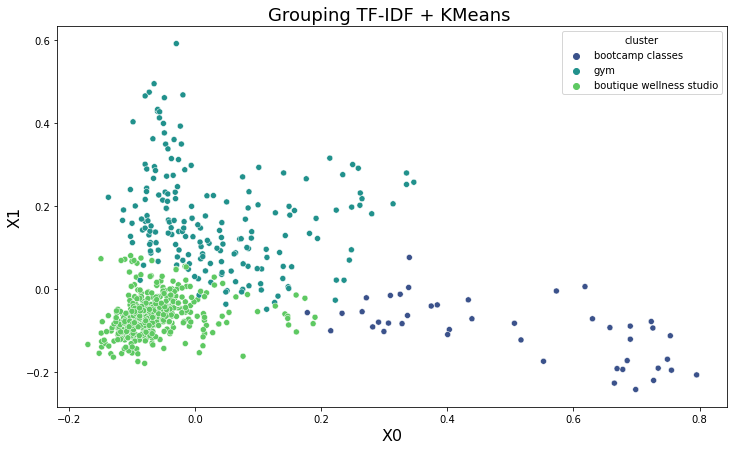

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_fitness, x='x0', y='x1', hue='cluster', palette="viridis")
plt.savefig('fitness_clustering.png')

plt.show()

#Clustering real_estate

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_real_estate['caption'])

In [97]:
df_real_estate['SUB-CATEGORY'].unique()

array(['estate agents'], dtype=object)

#Clustering for df_retail

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_retail['caption'])

In [99]:
df_retail['SUB-CATEGORY'].unique()

array(['deli shop', 'florist', 'dessert shop',
       'wine, beer & spirits shop'], dtype=object)

In [100]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [101]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [102]:
df_retail['cluster'] = clusters
df_retail['x0'] = x0
df_retail['x1'] = x1

cluster_map_retail = {0: 'deli shop', 1:'florist', 2:'dessert shop',3: 'wine', 4: 'beer & spirits shop'} # mapping found through get_top_keywords
df_retail['cluster'] = df_retail['cluster'].map(cluster_map_retail);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [103]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20, df_retail)


Cluster 0
classic,delicate,holiday,full,bank,colours,customers,blooms,businesses,june,viant,adding,colour,palette,lovely,roses,christmas,number,week,bouquet

Cluster 1
well,realdrinks,you,it,see,new,co,uk,drinks,twickenham,find,folks,store,ve,vale,maida,wine,beer,re,we

Cluster 2
hill,park,today,leaving,bushy,left,ing,hampton,ings,teddington,whoever,finds,mini,hope,benches,joy,posies,the,fairies,flower

Cluster 3
fabulous,today,happy,blooms,it,hope,tulips,gorgeous,day,autumnal,wonderful,pink,thank,the,flowers,back,beautiful,love,bouquets,week

Cluster 4
made,cured,have,delivery,valentine,day,limited,cookie,today,pm,bio,link,available,order,our,we,leith,new,online,shop


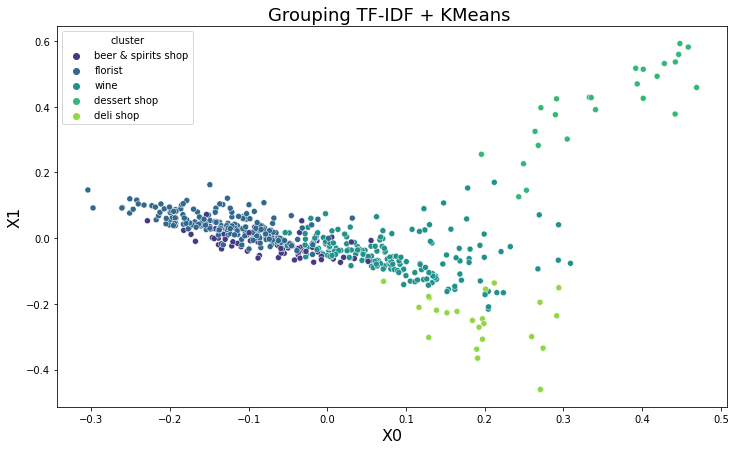

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_retail, x='x0', y='x1', hue='cluster', palette="viridis")
plt.savefig('retail_clustering.png')

plt.show()

#Clustering df_sport_recreation

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_sport_recreation['caption'])

In [106]:
df_sport_recreation['SUB-CATEGORY'].unique()

array(['public pool', 'paddleboard rental', 'swimming school'],
      dtype=object)

In [107]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [108]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [109]:
df_sport_recreation['cluster'] = clusters
df_sport_recreation['x0'] = x0
df_sport_recreation['x1'] = x1

cluster_map_sport = {0: 'public pool', 1: 'paddleboard rental', 2:'swimming school'} # mapping found through get_top_keywords
df_sport_recreation['cluster'] = df_sport_recreation['cluster'].map(cluster_map_sport);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [110]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20, df_sport_recreation)


Cluster 0
bookings,always,clients,since,we,in,courses,holiday,mum,time,instructor,swimming,vfg,children,lessons,term,https,buff,ly,swimway

Cluster 1
summer,happy,thames,co,uk,session,see,activerichmond,richmond,www,get,water,today,day,great,we,paddle,river,it,weekend

Cluster 2
week,spg,swimming,team,ymca,via,book,please,new,the,forward,th,look,ll,app,us,hampton,swim,we,pool


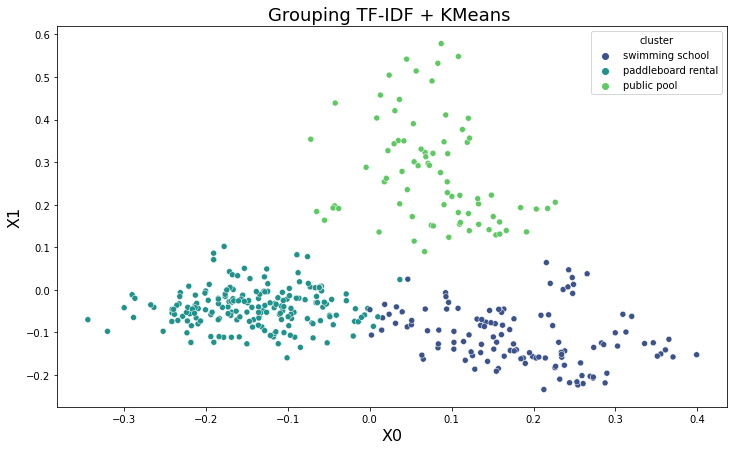

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_sport_recreation, x='x0', y='x1', hue='cluster', palette="viridis")
plt.savefig('sport_clustering.png')

plt.show()

#Clustering for df_fashion

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_fashion['caption'])

In [113]:
df_fashion['SUB-CATEGORY'].unique()

array(['Swedish footwear'], dtype=object)

#Clustering for df_childcare


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_childcare['caption'])

In [115]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=2, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [116]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [117]:
df_childcare['SUB-CATEGORY'].unique()

array(['nursery', 'preparatory school'], dtype=object)

In [118]:
df_childcare['cluster'] = clusters
df_childcare['x0'] = x0
df_childcare['x1'] = x1

cluster_map_childcare = {0: "nursery", 1: "preparatory school"} # mapping found through get_top_keywords
df_childcare['cluster'] = df_childcare['cluster'].map(cluster_map_childcare);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [119]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20, df_childcare)


Cluster 0
the,evening,week,take,term,fantastic,last,also,pupils,congratulations,yesterday,recently,day,great,boys,time,they,done,well,year

Cluster 1
year,back,class,enjoyed,link,bio,today,boys,learning,us,look,pupils,children,school,new,term,week,the,nursery,we


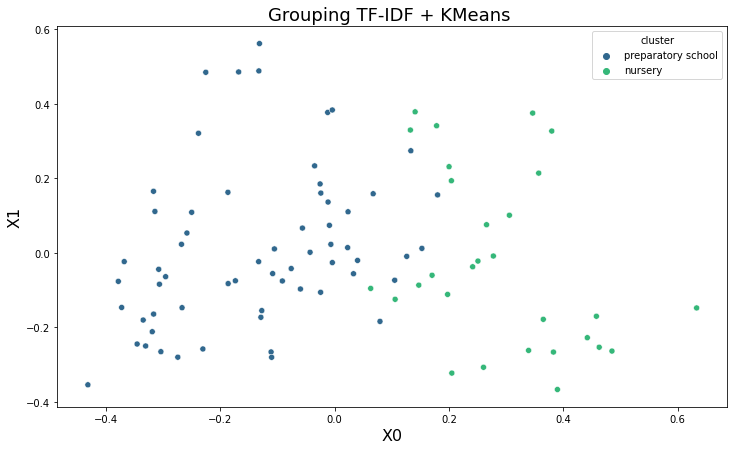

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_childcare, x='x0', y='x1', hue='cluster', palette="viridis")
plt.savefig('childcare_clustering.png')
plt.show()